In [11]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import time

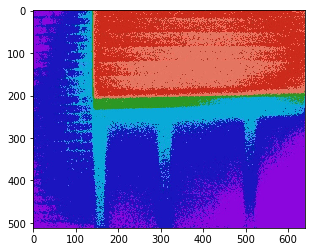

In [2]:
image = cv2.imread("Mesuem_Tryout 6.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values)

[[219.   5. 134.]
 [224.  10. 139.]
 [222.   7. 140.]
 ...
 [221.   6. 139.]
 [221.   6. 139.]
 [221.   6. 139.]]


In [4]:
start = time.time()
kmeans = KMeans(n_clusters=6, random_state=0, n_jobs = -1).fit(pixel_values)
end = time.time()
print("Time consumed in working: ",end - start)

Time consumed in working:  7.319765567779541


In [8]:
centers = kmeans.cluster_centers_
centers = np.uint8(centers)
print(centers)
labels = kmeans.labels_
print(labels)

[[189  21  27]
 [ 28  44 198]
 [219 162  20]
 [219  10 128]
 [ 94 115 232]
 [ 45 148  46]]
[3 3 3 ... 3 3 3]


In [9]:
segment_image = centers[labels]
segment_image

array([[219,  10, 128],
       [219,  10, 128],
       [219,  10, 128],
       ...,
       [219,  10, 128],
       [219,  10, 128],
       [219,  10, 128]], dtype=uint8)

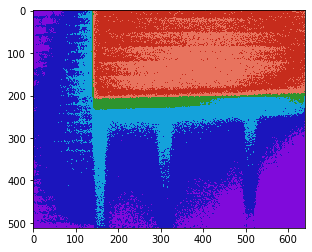

In [10]:
segment_image = segment_image.reshape(image.shape)
plt.imshow(cv2.cvtColor(segment_image, cv2.COLOR_BGR2RGB))